In [6]:
from lib import splitlines, split, safe, dampened_safe, F
example = """7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
1 3 6 7 9
"""

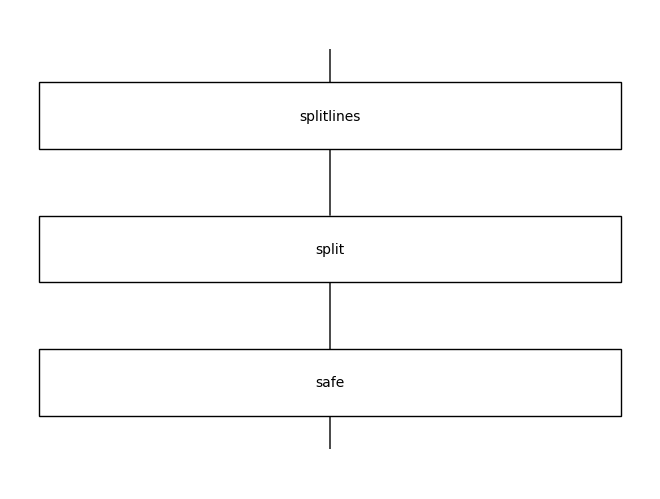

In [7]:
f1 = splitlines >> split >> safe
f1.draw()
assert F(f1)(example) == 2

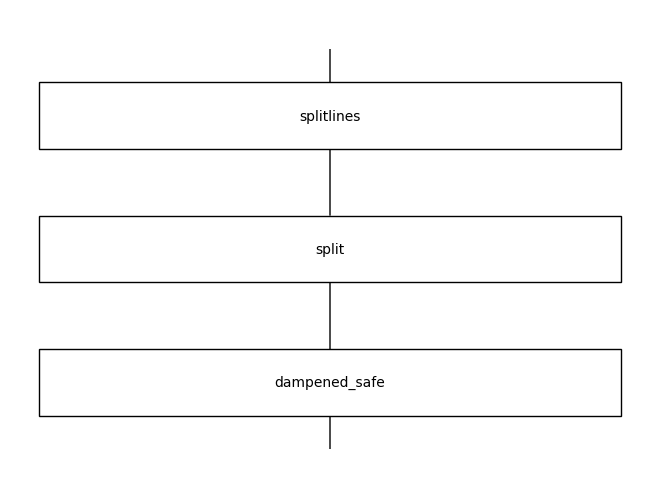

In [8]:
f2 = splitlines >> split >> dampened_safe
f2.draw()
assert F(f2)(example) == 4